In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import imutils
import PIL
import sys, os
from skimage.io import imread
import time
import tensorflow as tf
import numpy as np
import keras
#IMAGEFOLDER_PATH = "/home/mobsycho100/Desktop/Scara_Poultry/egg_dataset/"
RESIZEFOLDER_PATH = "/content/drive/MyDrive/Scara_Poultry/dataset/"
LABEL_PATH = "/content/drive/MyDrive/Scara_Poultry/labels/"
SIZE = (400,400,3)
BATCH_SIZE = 10
split_size = 13
box_size = SIZE[0]//split_size


def get_localvalue(truth,box_size,image_size):
    x,y = truth[:,1],truth[:,2]
    column = (x*image_size).astype(int)// box_size
    local_x = ((x*image_size).astype(int) % box_size)/box_size
    row = (y*image_size).astype(int) // box_size
    local_y = ((y*image_size).astype(int) % box_size)/box_size

    return row,column,local_x,local_y

def convert_to_float(filename):
    file = open(LABEL_PATH+filename,"r")
    lines = file.readlines()
    lines_array = np.zeros((len(lines),5))
    lines = [i.replace("\n","") for i in lines]
    for i in range(0,len(lines)):
        line = lines[i].split()
        line = [float(j) for j in line]
        lines_array[i,:] = line
    return lines_array

def filelists(RESIZEFOLDER_PATH,LABEL_PATH):
    pwd = os.getcwd()
    os.chdir(RESIZEFOLDER_PATH)
    X_list = os.listdir()
    os.chdir(LABEL_PATH)
    Y_list = [(X_list[i].split(".")[0] +".txt") for i in range(len(X_list))]
    os.chdir(pwd)
    #for i in range(len(X_list)):
    #    print(X_list[i]+"     "+Y_list[i])
    return X_list,Y_list
def get_data(batch_x,batch_y,split_size,box_size,image_size):
    X = np.array([imread(RESIZEFOLDER_PATH + file_name)for file_name in batch_x])/255.0
    print("X read")
    Y = np.zeros((len(batch_y),split_size,split_size,5))
    for i in range(0,len(batch_y)):
        ground_truths = convert_to_float(batch_y[i])
        #print(ground_truths)
        row,column,local_x,local_y = get_localvalue(ground_truths,box_size ,image_size)
        for j in range(0,len(ground_truths)):
            Y[i,row[j],column[j]] = ground_truths[j,0],local_x[j],local_y[j],ground_truths[j,3],ground_truths[j,4]

    return X,Y

def savefile(X,Y):
    np.save("X.npy",X)
    np.save("Y.npy",Y)
    print("file saved")

In [ ]:
use_tpu = True #@param {type:"boolean"}

if use_tpu:
    assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

if 'COLAB_TPU_ADDR' in os.environ:
  TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
else:
  TF_MASTER=''
tpu_address = TF_MASTER

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(TF_MASTER)
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
strategy = tf.distribute.experimental.TPUStrategy(resolver)

INFO:tensorflow:Initializing the TPU system: grpc://10.81.176.82:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.81.176.82:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt

In [ ]:
print(strategy.num_replicas_in_sync)

8


In [ ]:
def YOLO_model(input_shape):
    X_input = Input(input_shape)
    #400*400
    X = Conv2D(64, (3,3), strides = (1,1),padding='same', name = 'conv0')(X_input)
    X = BatchNormalization( name = 'bn0')(X)
    X = Activation('relu')(X)
    X = Conv2D(64, (3,3), strides = (1,1),padding='same', name = 'conv1')(X)
    X = BatchNormalization( name = 'bn1')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool1')(X)
    #200*200
    X = Conv2D(128, (3,3), strides = (1,1),padding='same', name = 'conv2')(X)
    X = BatchNormalization( name = 'bn2')(X)
    X = Activation('relu')(X)
    X = Conv2D(128, (3,3), strides = (1,1),padding='same', name = 'conv3')(X)
    X = BatchNormalization( name = 'bn3')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool2')(X)
    #100*100
    X = Conv2D(256, (3,3), strides = (1,1),padding='same', name = 'conv4')(X)
    X = BatchNormalization( name = 'bn4')(X)
    X = Activation('relu')(X)
    X = Conv2D(256, (3,3), strides = (1,1),padding='same', name = 'conv5')(X)
    X = BatchNormalization( name = 'bn5')(X)
    X = Activation('relu')(X)
    X = Conv2D(256, (3,3), strides = (1,1),padding='same', name = 'conv6')(X)
    X = BatchNormalization( name = 'bn6')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool3')(X)
    #50*50
    X = Conv2D(512, (3,3), strides = (1,1),padding='same', name = 'conv7')(X)
    X = BatchNormalization( name = 'bn7')(X)
    X = Activation('relu')(X)
    X = Conv2D(512, (3,3), strides = (1,1),padding='same', name = 'conv8')(X)
    X = BatchNormalization( name = 'bn8')(X)
    X = Activation('relu')(X)
    X = Conv2D(512, (3,3), strides = (1,1),padding='same', name = 'conv9')(X)
    X = BatchNormalization( name = 'bn9')(X)
    X = Activation('relu')(X)
    X = MaxPooling2D((2, 2), name='max_pool4')(X)
    #25*25
    X = Conv2D(1024, (3,3), strides = (1,1),padding='same', name = 'conv10')(X)
    X = BatchNormalization( name = 'bn10')(X)
    X = Activation('relu')(X)
    X = Conv2D(2048, (3,3), strides = (2,2),padding='same', name = 'conv11')(X)
    X = BatchNormalization( name = 'bn11')(X)
    X = Activation('relu')(X)
    X = Conv2D(5, (1,1), strides = (1,1),padding='valid',name = 'conv12')(X)

    X = Activation('sigmoid')(X)
    #13*13

    model = Model(inputs = X_input, outputs = X, name='egg_YOLO')
    #model.summary()
    return model

def loss_function(target,prediction):
    mse = tf.keras.losses.mean_squared_error
    #existbox = tf.stack([target[:,:,:,0],target[:,:,:,0],target[:,:,:,0],target[:,:,:,0]], axis =-1)
    existbox = target[:,:,:,0]
    #print(existbox.shape)

    lambda_box = 5
    lambda_obj = 0.05
    lambda_noobj = .05

    #----box loss---------#

    #box_predictions = existbox * (prediction[:,:,:,1:5])
    box_predictions = tf.stack([existbox,existbox,existbox,existbox], axis = -1) * (prediction[:,:,:,1:5])

    #box_target = existbox * (target[:,:,:,1:5])
    box_target = tf.stack([existbox,existbox,existbox,existbox], axis = -1) * (target[:,:,:,1:5])
    #print((tf.math.sign(box_predictions[:,:,:,2:4])* tf.math.sqrt(tf.math.abs(box_predictions[:,:,:,2:4]+1e-6))).shape)
    box_predictions = tf.concat([box_predictions[:,:,:,0:2], tf.math.sign(box_predictions[:,:,:,2:4])*
                                tf.math.sqrt(tf.math.abs(box_predictions[:,:,:,2:4]+1e-6))], axis = -1)
    #print(box_predictions.shape)
    box_target = tf.concat([box_target[:,:,:,0:2],tf.math.sqrt(box_target[:,:,:,2:4])], axis = -1)
    box_predictions = tf.reshape(box_predictions,[-1,4])
    #print(box_predictions.shape)

    box_target = tf.reshape(box_target,[-1,4])
    #   print(box_target.shape)
    box_loss = mse(box_target,box_predictions)
= tf.reshape(existbox * prediction[:,:,:,0],[-1])
    target_confidence = tf.reshape(existbox * target[:,:,:,0],[-1])
    object_loss = mse(target_confidence,box_confidence)

    #-----object loss------#
    box_confidence 
    #-----no object loss-----#

    noobj_prediction = tf.reshape((1-existbox) * prediction[:,:,:,0],[-1])
    noobj_target = tf.reshape((1-existbox) * target[:,:,:,0],[-1])
    noobj_loss =  mse(noobj_target,noobj_prediction)

    #----total loss---#

    loss = (lambda_box * box_loss
            + lambda_obj * object_loss
            + lambda_noobj * noobj_loss
            )
    return loss

def Train(X,Y,model):
    #generator_yolo = Yolo_generator(RESIZEFOLDER_PATH,LABEL_PATH,SPLIT_SIZE,SIZE[0],BATCH_SIZE)
    
    his = model.fit(X,Y,validation_split=0.008 ,epochs=180, batch_size=131)
    print(his.history.keys())
    model_json = model.to_json()
    with open("model5.json", "w") as json_file:
        json_file.write(model_json)
    # serialize weights to HDF5
    model.save_weights("model5.h5")
    print("Saved model to disk")
    return his

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.003)

with strategy.scope():
  model = YOLO_model(SIZE)
  model.compile(optimizer=opt,loss=loss_function) 


In [ ]:
X,Y = filelists(RESIZEFOLDER_PATH,LABEL_PATH)
X,Y = get_data(X,Y,split_size,box_size,SIZE[0])


X read


In [ ]:
print(X.shape)

(1048, 400, 400, 3)


In [ ]:

history = Train(X,Y,model)


Epoch 1/180
8/8 [==============================] - 63s 5s/step - loss: 0.0070 - val_loss: 0.0646
Epoch 2/180
8/8 [==============================] - 5s 687ms/step - loss: 0.0043 - val_loss: 0.0540
Epoch 3/180
8/8 [==============================] - 5s 683ms/step - loss: 0.0031 - val_loss: 0.0157
Epoch 4/180
8/8 [==============================] - 5s 684ms/step - loss: 0.0025 - val_loss: 0.0154
Epoch 5/180
8/8 [==============================] - 5s 683ms/step - loss: 0.0024 - val_loss: 0.0154
Epoch 6/180
8/8 [==============================] - 5s 687ms/step - loss: 0.0024 - val_loss: 0.0154
Epoch 7/180
8/8 [==============================] - 5s 682ms/step - loss: 0.0023 - val_loss: 0.0154
Epoch 8/180
8/8 [==============================] - 5s 685ms/step - loss: 0.0022 - val_loss: 0.0154
Epoch 9/180
8/8 [==============================] - 5s 680ms/step - loss: 0.0022 - val_loss: 0.0154
Epoch 10/180
8/8 [==============================] - 5s 682ms/step - loss: 0.0022 - val_loss: 0.0154
Epoch 11/18

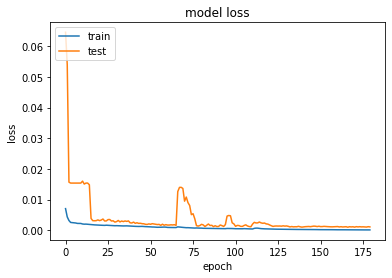

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import pickle
with open('/content/drive/MyDrive/Scara_Poultry/history_dict', 'wb') as file_pi:
  pickle.dump(history.history, file_pi)

In [ ]:
Train(X,Y,model)

In [ ]:
for i in range(len(X)):
  #print(i)
  X[i] = tf.image.flip_up_down(X[i]).numpy()
  Y[i] = tf.image.flip_up_down(Y[i]).numpy()

In [ ]:
Train(X,Y,model)

In [ ]:
os.chdir("/content/drive/MyDrive/Scara_Poultry/")
def load_model():
    try:
        #print(os.getcwd())
        json_file = open("/content/drive/MyDrive/Scara_Poultry/model4.json", 'r')
        #print("loaded model")
        loaded_model_json = json_file.read()
        #print(loaded_model_json)
        json_file.close()
        model = model_from_json(loaded_model_json)
        #print("blah")
        # load weights into new model
        model.load_weights("model4.h5")
        return model
    except:
        print("error loading files \n make sure files exist")

In [ ]:
image = (np.array(imread("/content/drive/MyDrive/Scara_Poultry/test/res_1.jpg")))
img = (image/255).reshape(1,400,400,3)
print(img.shape)
model = load_model()
X_pred = model.predict(img)
print(X_pred.shape)

(1, 400, 400, 3)
(1, 13, 13, 5)


In [ ]:
  def filtering(box_output,threshold):
    box_confidence = box_output[:,:,:,0]
    filter = (box_confidence> threshold)
    boxes = tf.boolean_mask(box_output,filter)
    scores = tf.boolean_mask(box_confidence,filter)
    return boxes,scores,filter

In [ ]:
mat = (X_pred[0,:,:,0]*1000//1)
print(mat)
print(np.argmax(mat))
selected_box  = X_pred[0,5,6,:]
print(selected_box)


[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0. 17. 18.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  2. 56. 19.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  5. 40.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  3.  1.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
71
[0.05676961 0.82979345 0.3946181  0.4355862  0.41130382]


In [ ]:
bs = 400//13

x_pos = int((6+selected_box[1])*bs)
y_pos = int((5+selected_box[2])*bs)
print(x_pos,y_pos)
height,width = int(selected_box[3]*400),int(400*selected_box[4])
x1,x2 = x_pos-width//2,x_pos+width//2
y1,y2 = y_pos-height//2,y_pos+height//2
print(x1,y1,x2,y2)


204 161
122 74 286 248


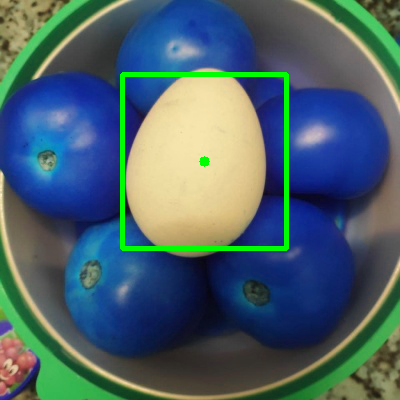

In [ ]:
from google.colab.patches import cv2_imshow
window_name = 'Image'
start_point = (x1,y1)
end_point = (x2, y2)
color = (0, 255, 0)
thickness = 3
image = cv2.rectangle(image, start_point, end_point, color, thickness)
image = cv2.circle(image, (x_pos,y_pos), 5, color, -1)
cv2_imshow(image) 